In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [3]:
# Query for USC offensive stats along with weather, altitude, and distance
query = """
SELECT date, location, opponent, result,
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, opponent_passing_td, 
       opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, opponent_total_first_downs, 
       opponent_total_penalties, opponent_total_penalties_yds, opponent_total_fum, opponent_total_int, opponent_total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Defensive_Stats;
"""

usc_data = pd.read_sql(query, conn)


usc_data.head()

,date,location,opponent,result,opponent_passing_cmp,opponent_passing_att,opponent_completion_pct,opponent_passing_yds,opponent_passing_td,opponent_rushing_att,...,opponent_total_penalties,opponent_total_penalties_yds,opponent_total_fum,opponent_total_int,opponent_total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2022-09-03,H,Rice,W (66-14),14,28,50.0,134,0,34,...,4,55,0,4,4,83.5,0.000,11.0,51.0,0.00
1,2022-09-10,@,Stanford,W (41-28),20,35,57.1,220,1,45,...,5,42,2,2,4,81.8,0.035,15.4,30.0,312.15
2,2022-09-17,H,Fresno State,W (45-17),21,30,70.0,257,1,32,...,3,17,1,1,2,70.3,0.000,10.4,51.0,0.00
3,2022-09-24,@,Oregon State,W (17-14),17,29,58.6,167,0,31,...,6,35,0,4,4,63.2,0.000,10.2,70.0,768.56
4,2022-10-01,H,Arizona State,W (42-25),23,32,71.9,243,1,29,...,7,74,0,1,1,68.7,0.000,9.3,51.0,0.00


In [4]:

# distance ranges 
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# new column for distance categories
usc_data['Distance_Range'] = pd.cut(usc_data['distance_from'], bins=bins, labels=labels, right=False)


distance_grouped = usc_data.groupby('Distance_Range').agg({
    'opponent_passing_yds': 'mean',
    'opponent_rushing_yds': 'mean',
    'opponent_total_yards': 'mean',
    'opponent_completion_pct': 'mean',
    'opponent_passing_td': 'mean',
    'opponent_rushing_att': 'mean',
    'opponent_passing_att': 'mean',   
    'opponent_rushing_td': 'mean',
    'opponent_total_first_downs': 'mean',
    'opponent_total_to': 'mean'
}).reset_index()


distance_grouped.head()


,Distance_Range,opponent_passing_yds,opponent_rushing_yds,opponent_total_yards,opponent_completion_pct,opponent_passing_td,opponent_rushing_att,opponent_passing_att,opponent_rushing_td,opponent_total_first_downs,opponent_total_to
0,<500,239.941748,153.553398,393.495146,60.417476,1.757282,35.417476,34.252427,1.524272,21.339806,1.621359
1,500-1000,286.181818,123.545455,409.727273,62.981818,2.000000,34.272727,37.181818,1.136364,22.045455,1.727273
2,1000-1500,230.333333,235.666667,466.000000,52.733333,2.333333,42.333333,23.333333,2.666667,18.666667,1.333333
3,1500+,164.500000,200.200000,364.700000,54.620000,1.300000,36.700000,28.100000,2.100000,18.600000,1.100000


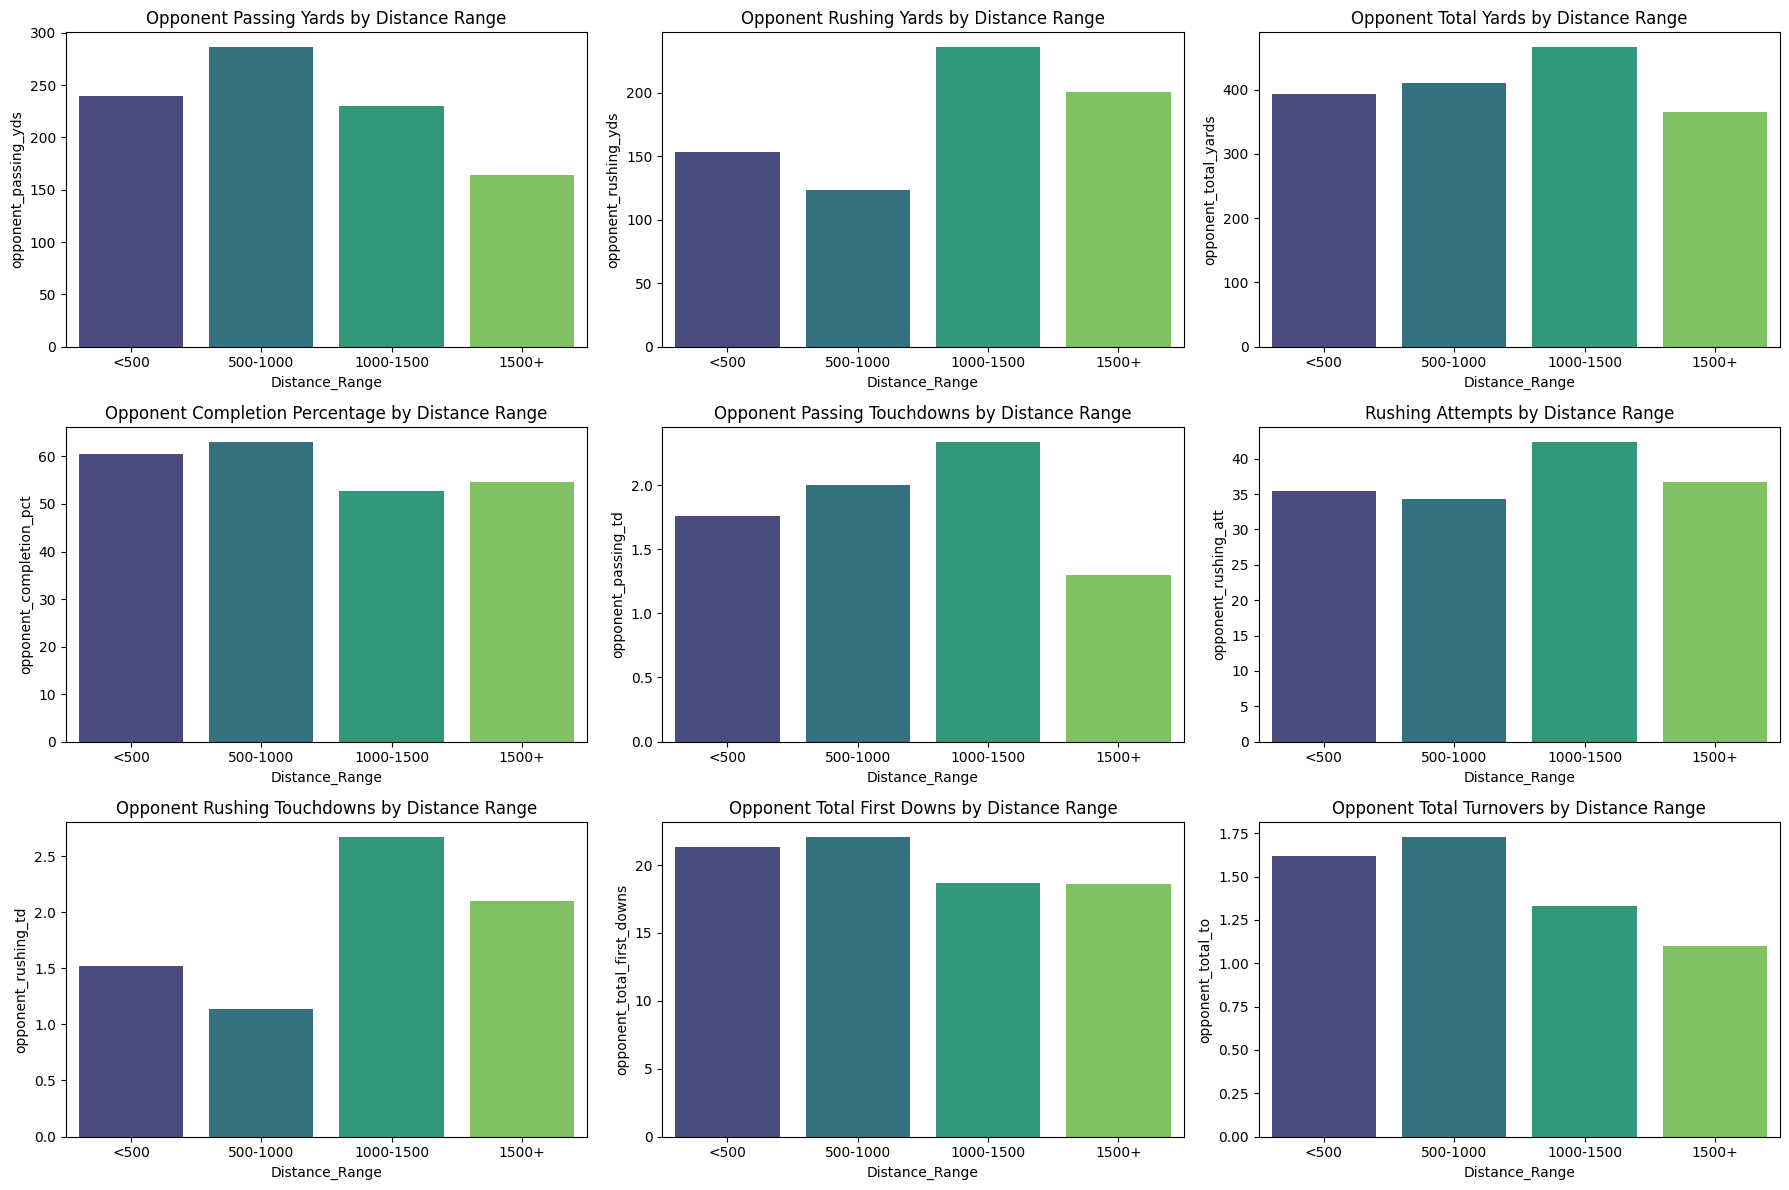

In [5]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Opponent Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Opponent Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Opponent Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Opponent Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Opponent Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Opponent Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Opponent Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Opponent Total Turnovers by Distance Range')


plt.tight_layout()
plt.show()


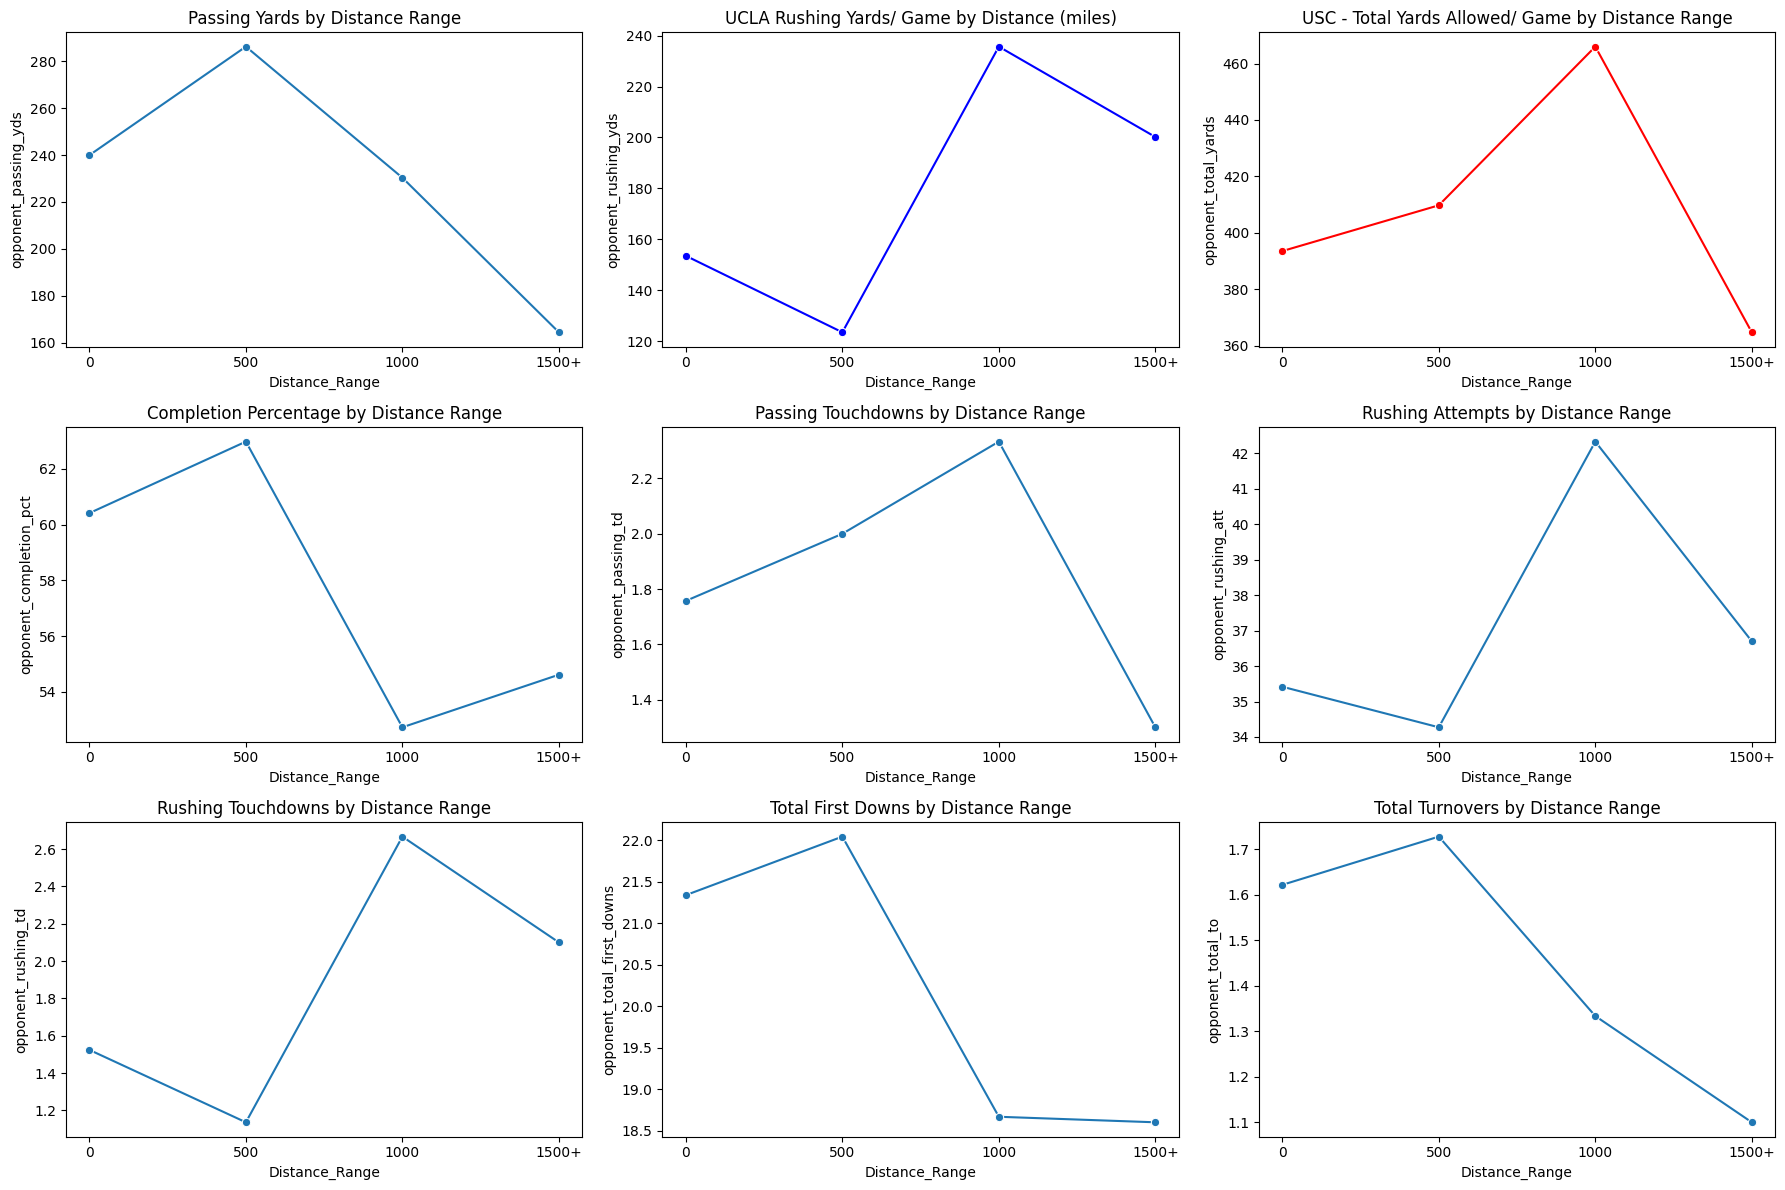

In [8]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'blue')
axs[0, 1].set_title('UCLA Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, marker='o', ax=axs[0, 2], color = 'red')
axs[0, 2].set_title('USC - Total Yards Allowed/ Game by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)


plt.tight_layout()
plt.show()
